In [2]:
from robot_vlp.config import RAW_DATA_DIR
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def normalize_angle_deg(angle):
    """Normalize an angle in degrees to the range [-180, 180]."""
    return (angle + 180) % 360 - 180

def normalize_angle_rad(angle):
    """Normalize an angle in radians to the range [-π, π]."""
    return (angle + np.pi) % (2 * np.pi) - np.pi

2025-05-16 10:21:25.295 | INFO     | robot_vlp.config:<module>:11 - PROJ_ROOT path is: /Users/tyrelglass/PhD/Repositories/robot-vlp


In [16]:
ekf_df = pd.read_csv(RAW_DATA_DIR / 'experiments/live_data/ekf_run.csv', index_col= [0])
enc_df = pd.read_csv(RAW_DATA_DIR / 'experiments/live_data/encoder_run.csv', index_col= [0])

In [11]:
def plot_run(filename, points):


    fig, axes = plt.subplots(1, 3, figsize=(10, 4))  # 4x4 grid


    ekf_df = pd.read_csv(RAW_DATA_DIR / ('experiments/live_data/'+'ekf_'+filename.split('_', 1)[1]), index_col= [0]).iloc[:points]
    enc_df = pd.read_csv(RAW_DATA_DIR / ('experiments/live_data/'+'encoder_'+filename.split('_', 1)[1]), index_col= [0]).iloc[:points]
    rnn_df = pd.read_csv(RAW_DATA_DIR / ('experiments/live_data/'+'rnn_'+filename.split('_', 1)[1]), index_col= [0]).iloc[:points]

    axes[0].set_title("EKF")
    axes[0].plot(ekf_df['real_x'], ekf_df['real_y'], label = 'real')
    axes[0].plot(ekf_df['ekf_x'], ekf_df['ekf_y'], label = 'ekf')
    axes[0].set_ylim(0, 1)
    axes[0].set_xlim(0, 1)
    axes[0].legend()

    axes[1].set_title("Encoder")
    axes[1].plot(enc_df['real_x'], enc_df['real_y'], label = 'real')
    axes[1].plot(enc_df['encoder_x'], enc_df['encoder_y'], label = 'encoder')
    axes[1].set_ylim(0, 1)
    axes[1].set_xlim(0, 1)
    axes[1].legend()

    axes[2].set_title("RNN")
    axes[2].plot(rnn_df['real_x'], rnn_df['real_y'], label = 'real')
    axes[2].plot(rnn_df['rnn_x'], rnn_df['rnn_y'], label = 'rnn')
    axes[2].set_ylim(0, 1)
    axes[2].set_xlim(0, 1)
    axes[2].legend()

    enc_ang_errs = normalize_angle_deg((enc_df['encoder_heading'] - enc_df['real_heading'])).abs()
    ekf_ang_errs = normalize_angle_deg((ekf_df['ekf_heading'] - ekf_df['real_heading'])).abs()
    rnn_ang_errs = normalize_angle_deg((rnn_df['rnn_heading'] - rnn_df['real_heading'])).abs()

    plt.figure()
    plt.title("Heading errors")
    plt.plot(enc_ang_errs, label = 'encoder')
    plt.plot(ekf_ang_errs, label = 'ekf')
    plt.plot(rnn_ang_errs, label = 'rnn')
    plt.legend()

    enc_loc_errs = np.sqrt((np.square(enc_df['encoder_x'] - enc_df['real_x']) + np.square(enc_df['encoder_y'] - enc_df['real_y']))[1:].to_list())
    ekf_loc_errs = np.sqrt((np.square(ekf_df['ekf_x'] - ekf_df['real_x']) + np.square(ekf_df['ekf_y'] - ekf_df['real_y']))[1:].to_list())
    rnn_loc_errs = np.sqrt((np.square(rnn_df['rnn_x'] - rnn_df['real_x']) + np.square(rnn_df['rnn_y'] - rnn_df['rnn_y']))[1:].to_list())

    plt.figure()

    plt.title("Location errors")
    plt.plot(enc_loc_errs, label = 'encoder')
    plt.plot(ekf_loc_errs, label = 'ekf')
    plt.plot(rnn_loc_errs, label = 'rnn')
    plt.legend()

    




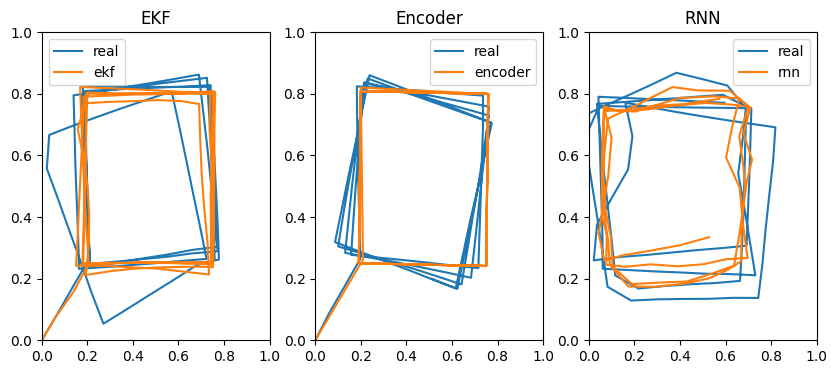

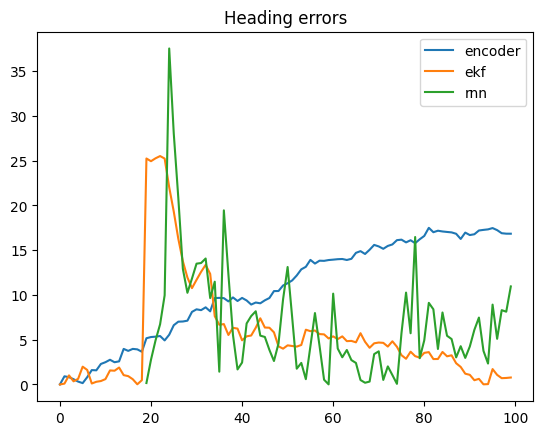

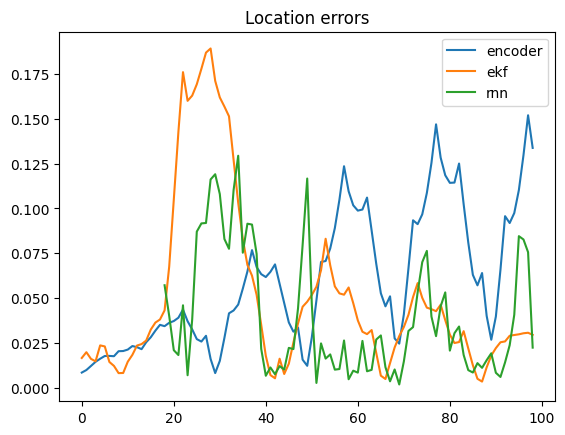

In [12]:
plot_run('ekf_run.csv', 100)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/tyrelglass/PhD/Repositories/robot-vlp/data/raw/experiments/live_data/rnn_eight_run.csv'

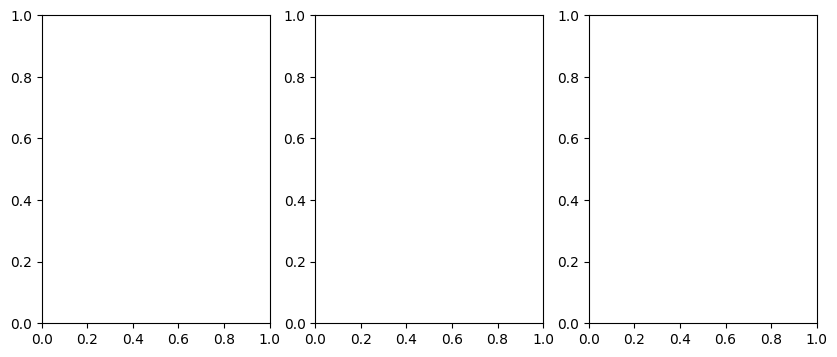

In [13]:
plot_run('encoder_eight_run.csv', 100)

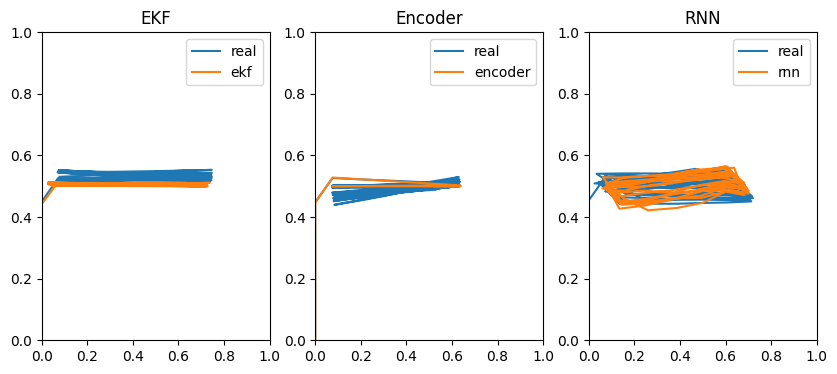

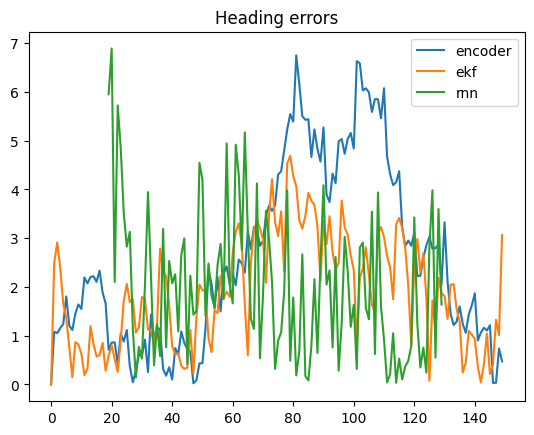

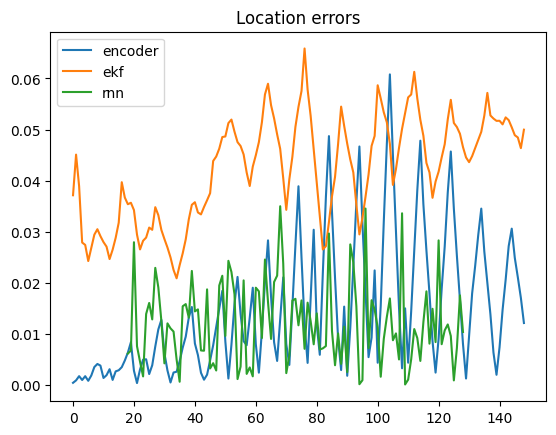

In [14]:
plot_run('ekf_line_run.csv', 150)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/tyrelglass/PhD/Repositories/robot-vlp/data/raw/experiments/live_data/rnn_lawn_run.csv'

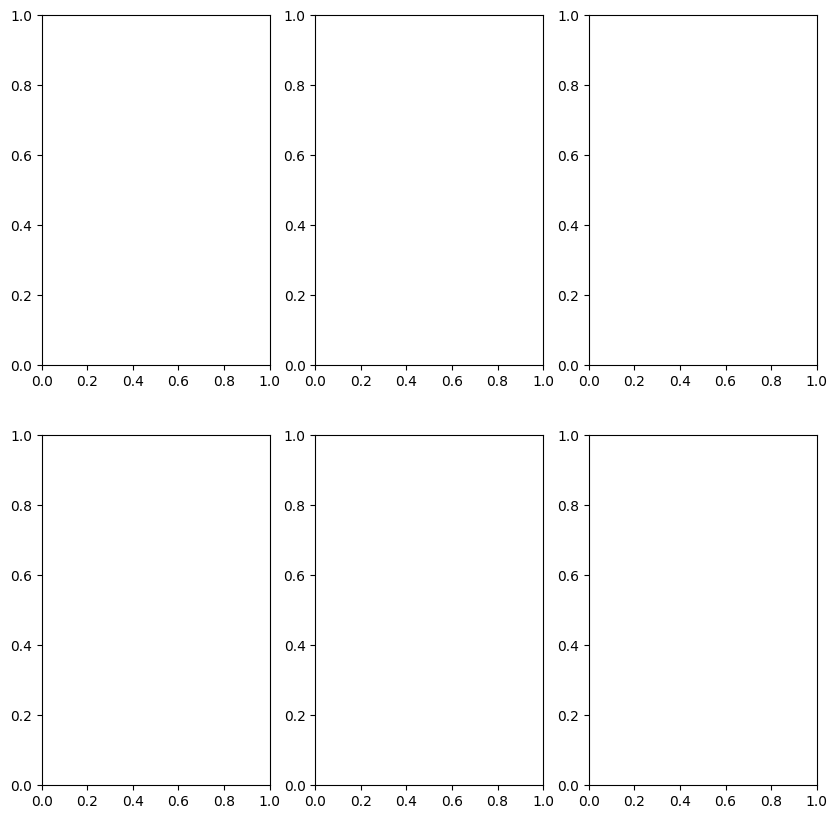

In [10]:
plot_run('encoder_lawn_run.csv', 150)

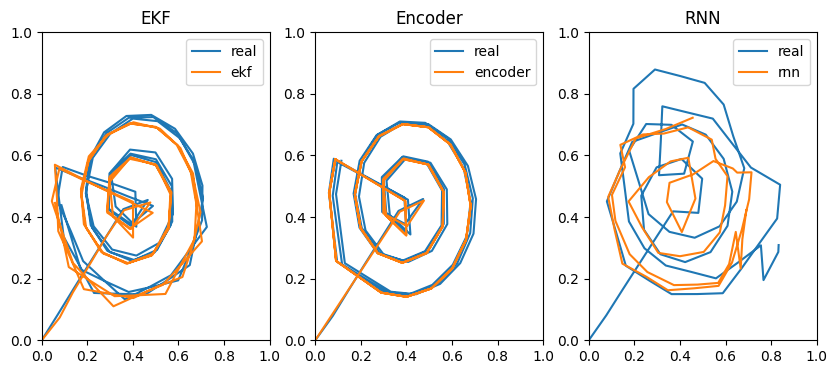

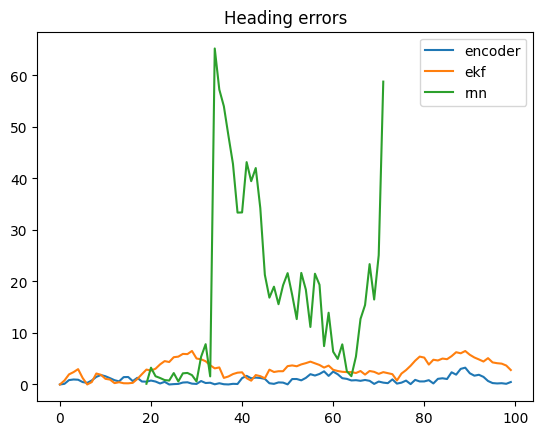

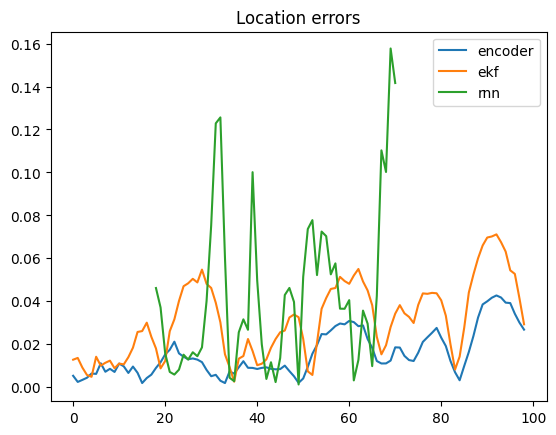

In [15]:
plot_run('ekf_cw_spiral_in_out_run.csv', 100)

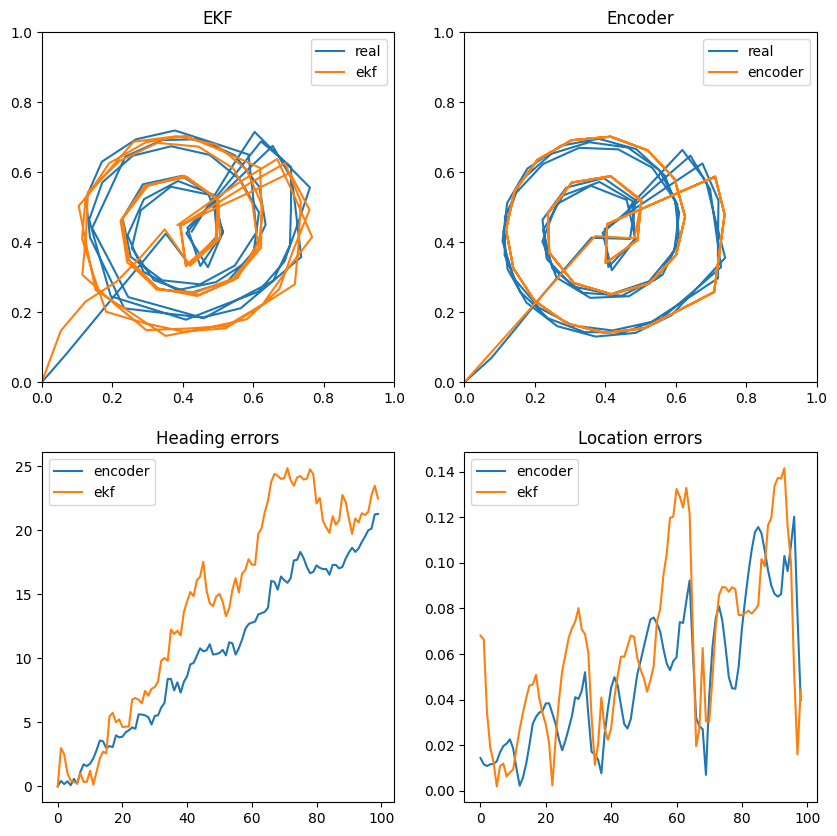

In [90]:
plot_run('ekf_ccw_spiral_in_out_run.csv', 100)

In [ ]:
np.sqrt(np.square(ekf_df['vlp_x'] - ekf_df['real_x']) + np.square(ekf_df['vlp_y'] - ekf_df['real_y'])).mean()*100

np.sqrt(np.square(enc_df['vlp_x'] - enc_df['real_x']) + np.square(enc_df['vlp_y'] - enc_df['real_y'])).mean()*100

4.574433941693681

4.357299531311269